In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = "pcos_dataset.csv"
pcos_data = pd.read_csv(file_path)
pcos_data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [2]:
# Display dataset information
print("Dataset Shape:", pcos_data.shape)
print("Missing Values:\n", pcos_data.isnull().sum())

Dataset Shape: (1000, 6)
Missing Values:
 Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64


In [3]:
# Define Features (X) and Target Variable (y)
X = pcos_data.drop(columns=['PCOS_Diagnosis'])  # Independent variables
y = pcos_data['PCOS_Diagnosis']  # Target variable

# Standardize the features (SVM performs better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset info
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")


Training Data Shape: (800, 5), Testing Data Shape: (200, 5)


In [4]:
# Function to train and evaluate SVM with different kernels
def train_svm(kernel_type):
    # Train SVM classifier
    model = SVC(kernel=kernel_type, C=1.0, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate Performance
    acc = accuracy_score(y_test, y_pred)
    print(f"\nSVM with {kernel_type} kernel - Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, y_pred

# Train SVM with different kernels
svm_linear, y_pred_linear = train_svm('linear')
svm_poly, y_pred_poly = train_svm('poly')  # Default degree=3
svm_rbf, y_pred_rbf = train_svm('rbf')
svm_sigmoid, y_pred_sigmoid = train_svm('sigmoid')



SVM with linear kernel - Accuracy: 0.8950
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       161
           1       0.74      0.72      0.73        39

    accuracy                           0.90       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.89      0.90      0.89       200


SVM with poly kernel - Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       161
           1       0.81      0.64      0.71        39

    accuracy                           0.90       200
   macro avg       0.86      0.80      0.83       200
weighted avg       0.90      0.90      0.90       200


SVM with rbf kernel - Accuracy: 0.9550
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       161
           1       0.89      0.87      0.

<Figure size 500x400 with 0 Axes>

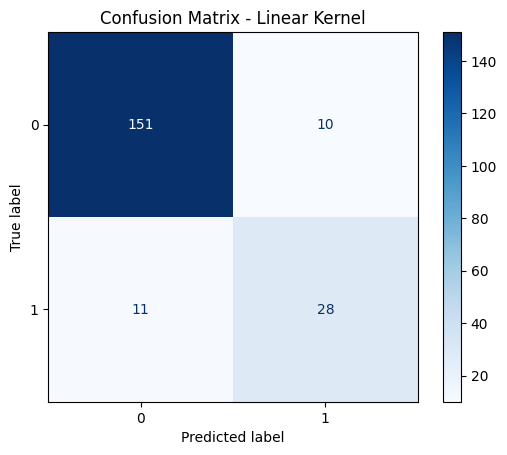

<Figure size 500x400 with 0 Axes>

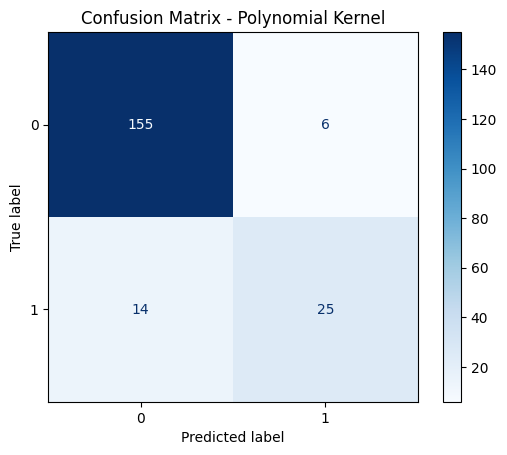

<Figure size 500x400 with 0 Axes>

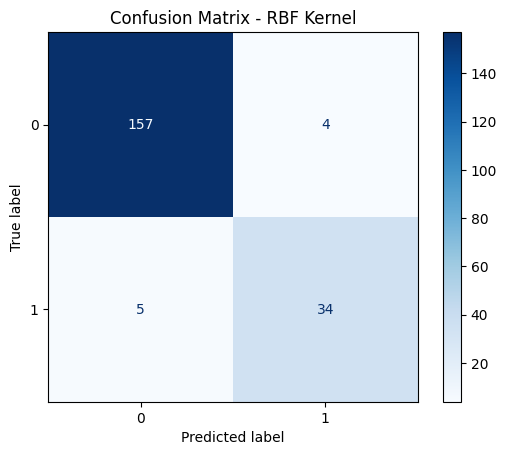

<Figure size 500x400 with 0 Axes>

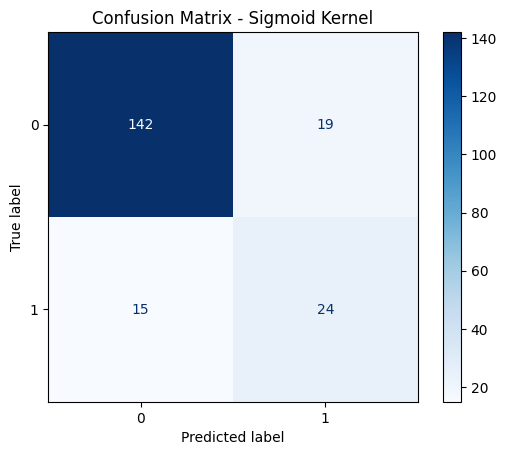

In [5]:
# Function to display confusion matrix
def plot_confusion_matrix(y_pred, kernel_type):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {kernel_type} Kernel")
    plt.show()

# Plot confusion matrices for each kernel
plot_confusion_matrix(y_pred_linear, 'Linear')
plot_confusion_matrix(y_pred_poly, 'Polynomial')
plot_confusion_matrix(y_pred_rbf, 'RBF')
plot_confusion_matrix(y_pred_sigmoid, 'Sigmoid')
